In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

csv_path = "/home/maitanha/cll_vlm/cll_vlm/ol_cll_logs/cifar20/cifar20_correspond.csv"

df = pd.read_csv(csv_path)
df.head

<bound method NDFrame.head of        index                      true_label                    random_label  \
0          0  large_omnivores_and_herbivores                          people   
1          1                        reptiles        non-insect_invertebrates   
2          2            fruit_and_vegetables                          people   
3          3                          people                           trees   
4          4                            fish    household_electrical_devices   
...      ...                             ...                             ...   
49995  49995                   small_mammals                  medium_mammals   
49996  49996                         insects  large_omnivores_and_herbivores   
49997  49997                large_carnivores                   small_mammals   
49998  49998                         insects                         flowers   
49999  49999                            fish                large_carnivores   

      pre

In [2]:
# --- 1. Count rows where true_label = random_label ---
same_label = df[df["true_label"] == df["random_label"]]
print("Rows where true_label = random_label:", len(same_label))
same_label.head

Rows where true_label = random_label: 2556


<bound method NDFrame.head of        index                     true_label                   random_label  \
28        28               large_carnivores               large_carnivores   
65        65                         people                         people   
89        89                        insects                        insects   
127      127                 medium_mammals                 medium_mammals   
193      193  large_man-made_outdoor_things  large_man-made_outdoor_things   
...      ...                            ...                            ...   
49895  49895                          trees                          trees   
49901  49901                           fish                           fish   
49924  49924               large_carnivores               large_carnivores   
49964  49964                          trees                          trees   
49984  49984       non-insect_invertebrates       non-insect_invertebrates   

      predicted raw_answer  
28  

In [3]:
OL_df = df[df["predicted"] == "OL"]
CL_df = df[df["predicted"] == "CL"]
print("nums OL: ", len(OL_df))
print("nums CL: ", len(CL_df))


print(OL_df.head)
print(CL_df.head)

nums OL:  6615
nums CL:  43385
<bound method NDFrame.head of        index                      true_label                  random_label  \
1          1                        reptiles      non-insect_invertebrates   
12        12                         flowers  large_natural_outdoor_scenes   
24        24                           trees  large_natural_outdoor_scenes   
28        28                large_carnivores              large_carnivores   
34        34  large_omnivores_and_herbivores  large_natural_outdoor_scenes   
...      ...                             ...                           ...   
49988  49988    household_electrical_devices           household_furniture   
49991  49991                 food_containers  household_electrical_devices   
49995  49995                   small_mammals                medium_mammals   
49997  49997                large_carnivores                 small_mammals   
49999  49999                            fish              large_carnivores   

  

In [4]:
# --- 2. Count rows where true_label = random_label but answer is NO ---
same_label_no = same_label[same_label["raw_answer"] == "NO"]
print("Rows where true_label = random_label but raw_answer = NO:", len(same_label_no))
same_label_no.head

Rows where true_label = random_label but raw_answer = NO: 726


<bound method NDFrame.head of        index                     true_label                   random_label  \
193      193  large_man-made_outdoor_things  large_man-made_outdoor_things   
211      211   specialized utility vehicles   specialized utility vehicles   
227      227                food_containers                food_containers   
383      383               large_carnivores               large_carnivores   
385      385                food_containers                food_containers   
...      ...                            ...                            ...   
49693  49693   household_electrical_devices   household_electrical_devices   
49745  49745   household_electrical_devices   household_electrical_devices   
49901  49901                           fish                           fish   
49924  49924               large_carnivores               large_carnivores   
49984  49984       non-insect_invertebrates       non-insect_invertebrates   

      predicted raw_answer  
193 

In [5]:
# --- 3. Count rows where true_label != random_label but answer is YES ---
diff_label_yes = df[(df["true_label"] != df["random_label"]) & (df["raw_answer"] == "YES")]
print("Rows where true_label != random_label but raw_answer = YES:", len(diff_label_yes))
diff_label_yes.head

Rows where true_label != random_label but raw_answer = YES: 4785


<bound method NDFrame.head of        index                      true_label                  random_label  \
1          1                        reptiles      non-insect_invertebrates   
12        12                         flowers  large_natural_outdoor_scenes   
24        24                           trees  large_natural_outdoor_scenes   
34        34  large_omnivores_and_herbivores  large_natural_outdoor_scenes   
55        55                         insects                 small_mammals   
...      ...                             ...                           ...   
49988  49988    household_electrical_devices           household_furniture   
49991  49991                 food_containers  household_electrical_devices   
49995  49995                   small_mammals                medium_mammals   
49997  49997                large_carnivores                 small_mammals   
49999  49999                            fish              large_carnivores   

      predicted raw_answer  
1   

Custom Confusion Matrix:
              Predict OL  Predict CL
True Label          1830         726
Random Label        4785       42659


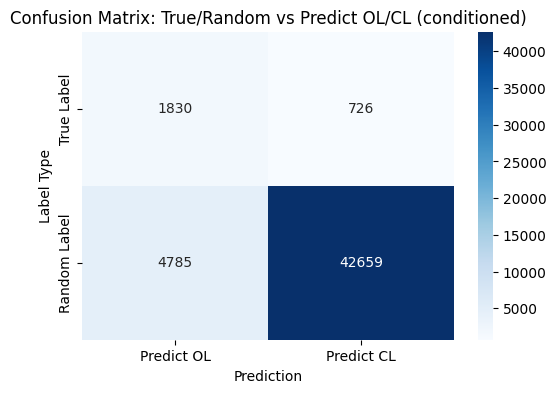

In [6]:
# Initialize counters
true_ol = true_cl = random_ol = random_cl = 0

for _, row in df.iterrows():
    same_label = (row["true_label"] == row["random_label"])
    
    if same_label:
        # Case 1: true_label == random_label
        if row["predicted"] == "OL":
            true_ol += 1
        else:  # predicted == "CL"
            true_cl += 1
    else:
        # Case 2: true_label != random_label
        if row["predicted"] == "OL":
            random_ol += 1   # model chose true
        else:  # predicted == "CL"
            random_cl += 1  # model chose random

# Build confusion matrix
matrix = pd.DataFrame(
    [[true_ol, true_cl],
     [random_ol, random_cl]],
    index=["True Label", "Random Label"],
    columns=["Predict OL", "Predict CL"]
)

print("Custom Confusion Matrix:")
print(matrix)

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix: True/Random vs Predict OL/CL (conditioned)")
plt.ylabel("Label Type")
plt.xlabel("Prediction")
plt.show()

### Does the label '{label}' correspond to this image%3F %5Cn Answer strictly with 'YES' or 'NO'.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

df = pd.read_csv("E:\CLL_VLM\Does the label '{label}' correspond to this image%3F %5Cn Answer strictly with 'YES' or 'NO'..csv")

df.head

<bound method NDFrame.head of        index  true_label random_label predicted raw_answer
0          0        frog          cat        OL        YES
1          1       truck     airplane        CL         NO
2          2       truck   automobile        CL         NO
3          3        deer        truck        CL         NO
4          4  automobile        horse        CL         NO
...      ...         ...          ...       ...        ...
49995  49995        bird         frog        CL         NO
49996  49996        frog         bird        CL         NO
49997  49997       truck         deer        CL         NO
49998  49998  automobile         deer        CL         NO
49999  49999  automobile        truck        CL         NO

[50000 rows x 5 columns]>

Custom Confusion Matrix:
              Predict OL  Predict CL
True Label          4276         713
Random Label         930       44081


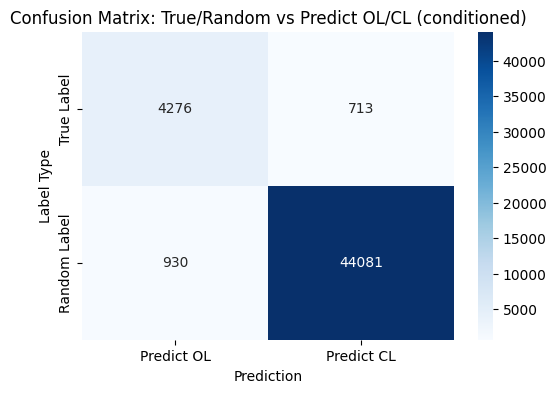

In [2]:
# Initialize counters
true_ol = true_cl = random_ol = random_cl = 0

for _, row in df.iterrows():
    same_label = (row["true_label"] == row["random_label"])
    
    if same_label:
        # Case 1: true_label == random_label
        if row["predicted"] == "OL":
            true_ol += 1
        else:  # predicted == "CL"
            true_cl += 1
    else:
        # Case 2: true_label != random_label
        if row["predicted"] == "OL":
            random_ol += 1   # model chose true
        else:  # predicted == "CL"
            random_cl += 1  # model chose random

# Build confusion matrix
matrix = pd.DataFrame(
    [[true_ol, true_cl],
     [random_ol, random_cl]],
    index=["True Label", "Random Label"],
    columns=["Predict OL", "Predict CL"]
)

print("Custom Confusion Matrix:")
print(matrix)

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix: True/Random vs Predict OL/CL (conditioned)")
plt.ylabel("Label Type")
plt.xlabel("Prediction")
plt.show()

In [7]:
# Accuracy cơ bản
correct = matrix.loc["True Label", "Predict OL"] + matrix.loc["Random Label", "Predict CL"]
total = matrix.values.sum()
accuracy = correct / total

print("Accuracy: {:.2f}%".format(accuracy * 100))

# Tỷ lệ theo loại
true_acc = matrix.loc["True Label", "Predict OL"] / matrix.loc["True Label"].sum()
random_acc = matrix.loc["Random Label", "Predict CL"] / matrix.loc["Random Label"].sum()
noise_ol = matrix.loc["True Label", "Predict CL"] / matrix.loc["True Label"].sum()
noise_cl = matrix.loc["Random Label", "Predict OL"] / matrix.loc["Random Label"].sum()

print("(True Label -> OL): {:.2f}%".format(true_acc * 100))
print("(Random Label -> CL): {:.2f}%".format(random_acc * 100))
print("Noise OL: {:.2f}%".format(noise_ol * 100))
print("Noise CL: {:.2f}%".format(noise_cl * 100))


Accuracy: 96.71%
(True Label -> OL): 85.71%
(Random Label -> CL): 97.93%
Noise OL: 14.29%
Noise CL: 2.07%


Top 10 lỗi: True != Random nhưng dự đoán OL
   true_label random_label  count
19       deer        horse    237
40      truck   automobile    114
13        cat          dog     81
22        dog          cat     73
27       frog          cat     54
26       frog         bird     52
18       deer          dog     37
12        cat         bird     33
0    airplane   automobile     24
42      truck         ship     23


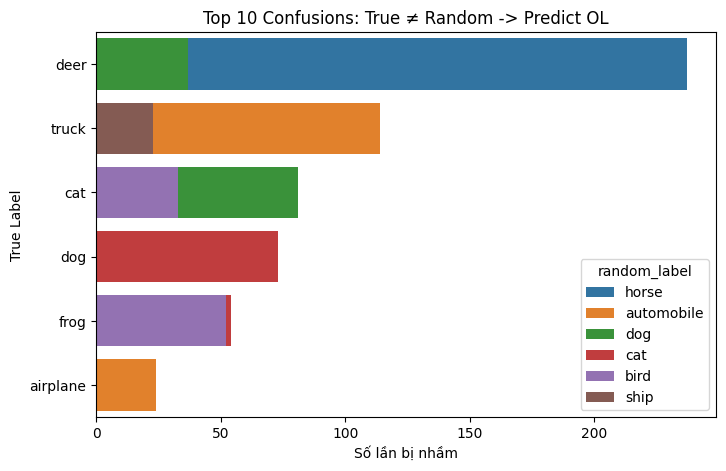

In [10]:
# --- Case 1: true != random nhưng dự đoán OL ---
errors_case1 = df[(df["true_label"] != df["random_label"]) & (df["predicted"] == "OL")]

top_confusions_case1 = (
    errors_case1.groupby(["true_label", "random_label"])
    .size()
    .reset_index(name="count")
    .sort_values("count", ascending=False)
    .head(10)
)

print("Top 10 lỗi: True != Random nhưng dự đoán OL")
print(top_confusions_case1)

plt.figure(figsize=(8,5))
sns.barplot(x="count", y="true_label", hue="random_label", data=top_confusions_case1, dodge=False)
plt.title("Top 10 Confusions: True ≠ Random -> Predict OL")
plt.xlabel("Số lần bị nhầm")
plt.ylabel("True Label")
plt.show()


Top 10 lỗi: True = Random nhưng dự đoán CL
   true_label random_label  count
6        frog         frog    224
4        deer         deer    176
2        bird         bird     79
8        ship         ship     59
9       truck        truck     44
0    airplane     airplane     41
3         cat          cat     40
5         dog          dog     35
7       horse        horse     11
1  automobile   automobile      4


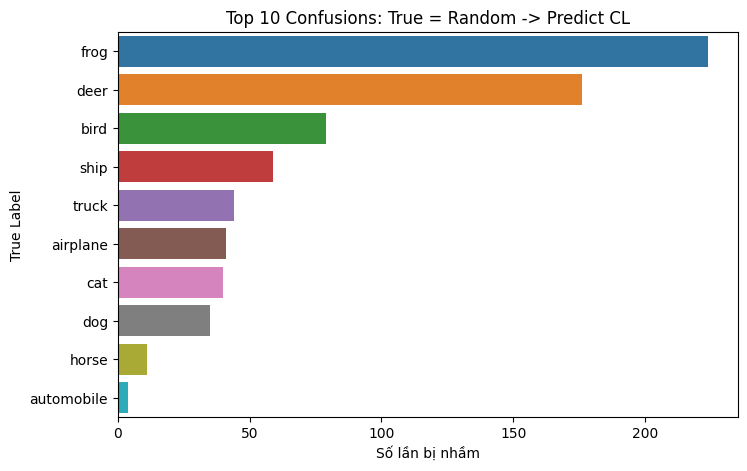

In [11]:
# --- Case 2: true == random nhưng dự đoán CL ---
errors_case2 = df[(df["true_label"] == df["random_label"]) & (df["predicted"] == "CL")]

top_confusions_case2 = (
    errors_case2.groupby(["true_label", "random_label"])
    .size()
    .reset_index(name="count")
    .sort_values("count", ascending=False)
    .head(10)
)

print("\nTop 10 lỗi: True = Random nhưng dự đoán CL")
print(top_confusions_case2)

plt.figure(figsize=(8,5))
sns.barplot(x="count", y="true_label", hue="random_label", data=top_confusions_case2, dodge=False)
plt.title("Top 10 Confusions: True = Random -> Predict CL")
plt.xlabel("Số lần bị nhầm")
plt.ylabel("True Label")
plt.show()

# Does the label '{label}' correspond to this image%3F Answer with only a single word%3A YES or NO.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

df = pd.read_csv("E:\CLL_VLM\Does the label '{label}' correspond to this image%3F Answer with only a single word%3A YES or NO..csv")

df.head

<bound method NDFrame.head of        index  true_label random_label predicted raw_answer
0          0        frog          cat        OL        YES
1          1       truck     airplane        CL         NO
2          2       truck   automobile        CL         NO
3          3        deer        truck        CL         NO
4          4  automobile        horse        CL         NO
...      ...         ...          ...       ...        ...
49995  49995        bird         frog        CL         NO
49996  49996        frog         bird        CL         NO
49997  49997       truck         deer        CL         NO
49998  49998  automobile         deer        CL         NO
49999  49999  automobile        truck        OL        YES

[50000 rows x 5 columns]>

Custom Confusion Matrix:
              Predict OL  Predict CL
True Label          4517         472
Random Label        1821       43190


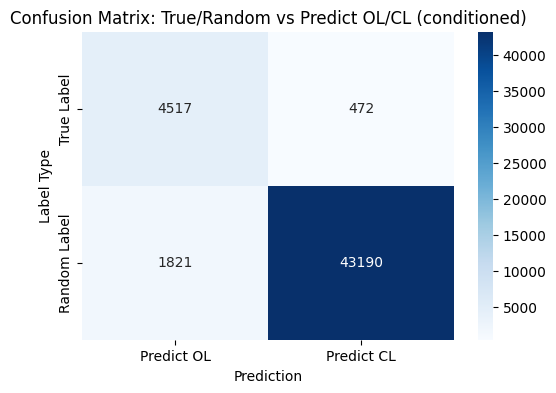

In [13]:
# Initialize counters
true_ol = true_cl = random_ol = random_cl = 0

for _, row in df.iterrows():
    same_label = (row["true_label"] == row["random_label"])
    
    if same_label:
        # Case 1: true_label == random_label
        if row["predicted"] == "OL":
            true_ol += 1
        else:  # predicted == "CL"
            true_cl += 1
    else:
        # Case 2: true_label != random_label
        if row["predicted"] == "OL":
            random_ol += 1   # model chose true
        else:  # predicted == "CL"
            random_cl += 1  # model chose random

# Build confusion matrix
matrix = pd.DataFrame(
    [[true_ol, true_cl],
     [random_ol, random_cl]],
    index=["True Label", "Random Label"],
    columns=["Predict OL", "Predict CL"]
)

print("Custom Confusion Matrix:")
print(matrix)

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix: True/Random vs Predict OL/CL (conditioned)")
plt.ylabel("Label Type")
plt.xlabel("Prediction")
plt.show()

In [14]:
# Accuracy cơ bản
correct = matrix.loc["True Label", "Predict OL"] + matrix.loc["Random Label", "Predict CL"]
total = matrix.values.sum()
accuracy = correct / total

print("Accuracy: {:.2f}%".format(accuracy * 100))

# Tỷ lệ theo loại
true_acc = matrix.loc["True Label", "Predict OL"] / matrix.loc["True Label"].sum()
random_acc = matrix.loc["Random Label", "Predict CL"] / matrix.loc["Random Label"].sum()
noise_ol = matrix.loc["True Label", "Predict CL"] / matrix.loc["True Label"].sum()
noise_cl = matrix.loc["Random Label", "Predict OL"] / matrix.loc["Random Label"].sum()

print("(True Label -> OL): {:.2f}%".format(true_acc * 100))
print("(Random Label -> CL): {:.2f}%".format(random_acc * 100))
print("Noise OL: {:.2f}%".format(noise_ol * 100))
print("Noise CL: {:.2f}%".format(noise_cl * 100))


Accuracy: 95.41%
(True Label -> OL): 90.54%
(Random Label -> CL): 95.95%
Noise OL: 9.46%
Noise CL: 4.05%


Top 10 lỗi: True != Random nhưng dự đoán OL
   true_label random_label  count
27       deer        horse    325
55      truck   automobile    171
37       frog          cat    164
30        dog          cat    123
20        cat          dog    118
36       frog         bird     93
57      truck         ship     73
18        cat         bird     63
38       frog         deer     59
26       deer          dog     58


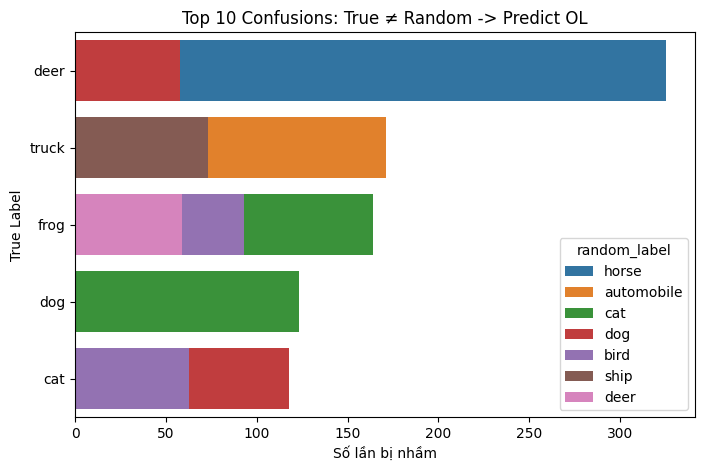

In [15]:
# --- Case 1: true != random nhưng dự đoán OL ---
errors_case1 = df[(df["true_label"] != df["random_label"]) & (df["predicted"] == "OL")]

top_confusions_case1 = (
    errors_case1.groupby(["true_label", "random_label"])
    .size()
    .reset_index(name="count")
    .sort_values("count", ascending=False)
    .head(10)
)

print("Top 10 lỗi: True != Random nhưng dự đoán OL")
print(top_confusions_case1)

plt.figure(figsize=(8,5))
sns.barplot(x="count", y="true_label", hue="random_label", data=top_confusions_case1, dodge=False)
plt.title("Top 10 Confusions: True ≠ Random -> Predict OL")
plt.xlabel("Số lần bị nhầm")
plt.ylabel("True Label")
plt.show()


Top 10 lỗi: True = Random nhưng dự đoán CL
   true_label random_label  count
6        frog         frog    183
4        deer         deer     85
2        bird         bird     65
8        ship         ship     36
0    airplane     airplane     26
9       truck        truck     25
3         cat          cat     23
5         dog          dog     23
1  automobile   automobile      3
7       horse        horse      3


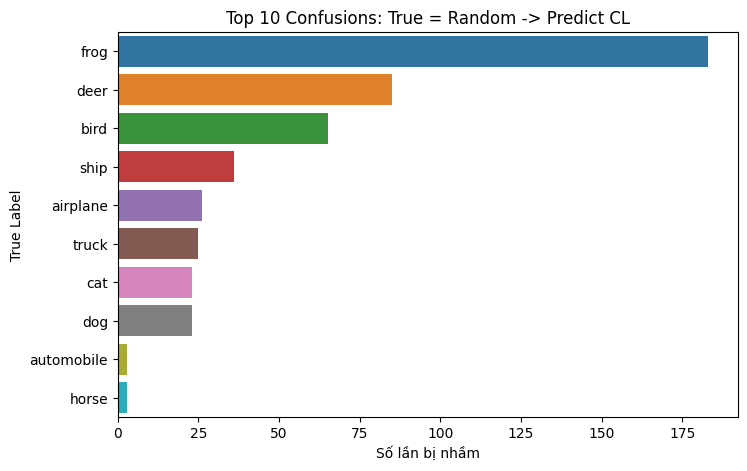

In [16]:
# --- Case 2: true == random nhưng dự đoán CL ---
errors_case2 = df[(df["true_label"] == df["random_label"]) & (df["predicted"] == "CL")]

top_confusions_case2 = (
    errors_case2.groupby(["true_label", "random_label"])
    .size()
    .reset_index(name="count")
    .sort_values("count", ascending=False)
    .head(10)
)

print("\nTop 10 lỗi: True = Random nhưng dự đoán CL")
print(top_confusions_case2)

plt.figure(figsize=(8,5))
sns.barplot(x="count", y="true_label", hue="random_label", data=top_confusions_case2, dodge=False)
plt.title("Top 10 Confusions: True = Random -> Predict CL")
plt.xlabel("Số lần bị nhầm")
plt.ylabel("True Label")
plt.show()

# Does the label '{label}' match this image%3F Answer with only a single word%3A YES or NO.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("E:\CLL_VLM\Does the label '{label}' match this image%3F Answer with only a single word%3A YES or NO..csv")

df.head

<bound method NDFrame.head of        index  true_label random_label predicted raw_answer
0          0        frog          cat        OL        YES
1          1       truck     airplane        CL         NO
2          2       truck   automobile        CL         NO
3          3        deer        truck        CL         NO
4          4  automobile        horse        CL         NO
...      ...         ...          ...       ...        ...
49995  49995        bird         frog        CL         NO
49996  49996        frog         bird        CL         NO
49997  49997       truck         deer        CL         NO
49998  49998  automobile         deer        CL         NO
49999  49999  automobile        truck        OL        YES

[50000 rows x 5 columns]>

Custom Confusion Matrix:
              Predict OL  Predict CL
True Label          4567         422
Random Label        1991       43020


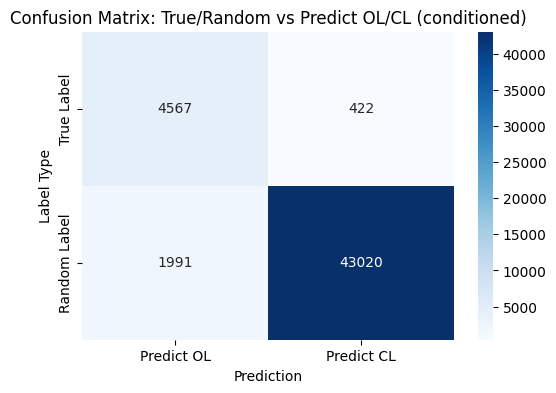

In [18]:
# Initialize counters
true_ol = true_cl = random_ol = random_cl = 0

for _, row in df.iterrows():
    same_label = (row["true_label"] == row["random_label"])
    
    if same_label:
        # Case 1: true_label == random_label
        if row["predicted"] == "OL":
            true_ol += 1
        else:  # predicted == "CL"
            true_cl += 1
    else:
        # Case 2: true_label != random_label
        if row["predicted"] == "OL":
            random_ol += 1   # model chose true
        else:  # predicted == "CL"
            random_cl += 1  # model chose random

# Build confusion matrix
matrix = pd.DataFrame(
    [[true_ol, true_cl],
     [random_ol, random_cl]],
    index=["True Label", "Random Label"],
    columns=["Predict OL", "Predict CL"]
)

print("Custom Confusion Matrix:")
print(matrix)

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix: True/Random vs Predict OL/CL (conditioned)")
plt.ylabel("Label Type")
plt.xlabel("Prediction")
plt.show()

In [19]:
# Accuracy cơ bản
correct = matrix.loc["True Label", "Predict OL"] + matrix.loc["Random Label", "Predict CL"]
total = matrix.values.sum()
accuracy = correct / total

print("Accuracy: {:.2f}%".format(accuracy * 100))

# Tỷ lệ theo loại
true_acc = matrix.loc["True Label", "Predict OL"] / matrix.loc["True Label"].sum()
random_acc = matrix.loc["Random Label", "Predict CL"] / matrix.loc["Random Label"].sum()
noise_ol = matrix.loc["True Label", "Predict CL"] / matrix.loc["True Label"].sum()
noise_cl = matrix.loc["Random Label", "Predict OL"] / matrix.loc["Random Label"].sum()

print("(True Label -> OL): {:.2f}%".format(true_acc * 100))
print("(Random Label -> CL): {:.2f}%".format(random_acc * 100))
print("Noise OL: {:.2f}%".format(noise_ol * 100))
print("Noise CL: {:.2f}%".format(noise_cl * 100))


Accuracy: 95.17%
(True Label -> OL): 91.54%
(Random Label -> CL): 95.58%
Noise OL: 8.46%
Noise CL: 4.42%


Top 10 lỗi: True != Random nhưng dự đoán OL
   true_label random_label  count
28       deer        horse    332
39       frog          cat    184
57      truck   automobile    161
32        dog          cat    135
20        cat          dog    124
38       frog         bird    104
40       frog         deer     80
60      truck         ship     75
18        cat         bird     68
27       deer          dog     63


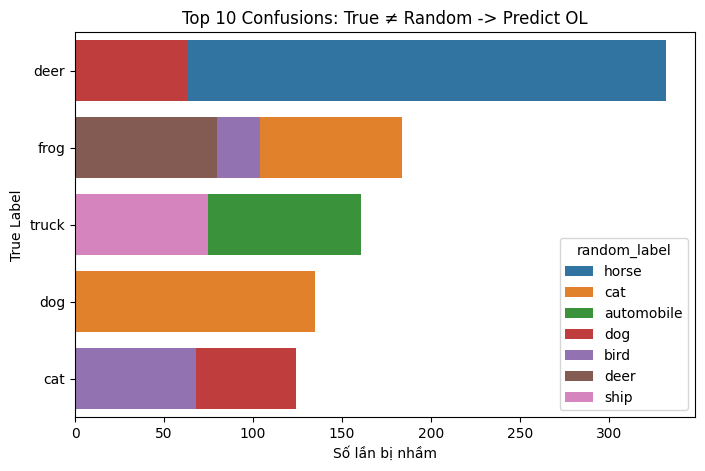

In [20]:
# --- Case 1: true != random nhưng dự đoán OL ---
errors_case1 = df[(df["true_label"] != df["random_label"]) & (df["predicted"] == "OL")]

top_confusions_case1 = (
    errors_case1.groupby(["true_label", "random_label"])
    .size()
    .reset_index(name="count")
    .sort_values("count", ascending=False)
    .head(10)
)

print("Top 10 lỗi: True != Random nhưng dự đoán OL")
print(top_confusions_case1)

plt.figure(figsize=(8,5))
sns.barplot(x="count", y="true_label", hue="random_label", data=top_confusions_case1, dodge=False)
plt.title("Top 10 Confusions: True ≠ Random -> Predict OL")
plt.xlabel("Số lần bị nhầm")
plt.ylabel("True Label")
plt.show()


Top 10 lỗi: True = Random nhưng dự đoán CL
   true_label random_label  count
6        frog         frog    167
4        deer         deer     67
2        bird         bird     65
8        ship         ship     32
0    airplane     airplane     22
3         cat          cat     22
5         dog          dog     21
9       truck        truck     20
1  automobile   automobile      3
7       horse        horse      3


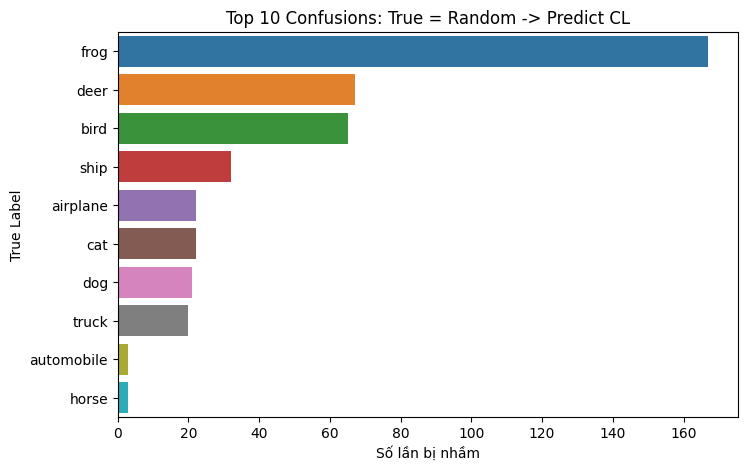

In [21]:
# --- Case 2: true == random nhưng dự đoán CL ---
errors_case2 = df[(df["true_label"] == df["random_label"]) & (df["predicted"] == "CL")]

top_confusions_case2 = (
    errors_case2.groupby(["true_label", "random_label"])
    .size()
    .reset_index(name="count")
    .sort_values("count", ascending=False)
    .head(10)
)

print("\nTop 10 lỗi: True = Random nhưng dự đoán CL")
print(top_confusions_case2)

plt.figure(figsize=(8,5))
sns.barplot(x="count", y="true_label", hue="random_label", data=top_confusions_case2, dodge=False)
plt.title("Top 10 Confusions: True = Random -> Predict CL")
plt.xlabel("Số lần bị nhầm")
plt.ylabel("True Label")
plt.show()

# Does the label {label} belong to this image%3F Answer with only a single word%3A YES or NO.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("E:\CLL_VLM\Does the label {label} belong to this image%3F Answer with only a single word%3A YES or NO..csv")

df.head

<bound method NDFrame.head of        index  true_label random_label predicted raw_answer
0          0        frog          cat        OL        YES
1          1       truck     airplane        CL         NO
2          2       truck   automobile        CL         NO
3          3        deer        truck        CL         NO
4          4  automobile        horse        CL         NO
...      ...         ...          ...       ...        ...
49995  49995        bird         frog        CL         NO
49996  49996        frog         bird        CL         NO
49997  49997       truck         deer        CL         NO
49998  49998  automobile         deer        CL         NO
49999  49999  automobile        truck        OL        YES

[50000 rows x 5 columns]>

Custom Confusion Matrix:
              Predict OL  Predict CL
True Label          4213         776
Random Label        2900       42111


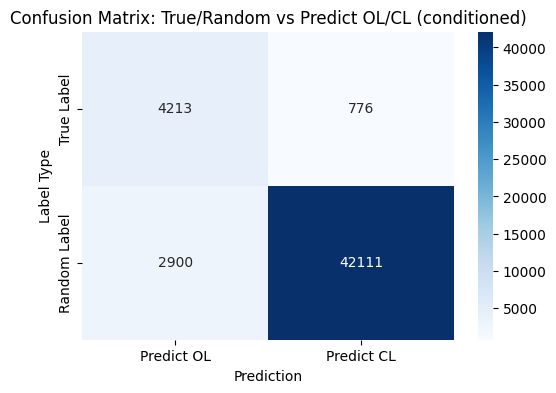

In [23]:
# Initialize counters
true_ol = true_cl = random_ol = random_cl = 0

for _, row in df.iterrows():
    same_label = (row["true_label"] == row["random_label"])
    
    if same_label:
        # Case 1: true_label == random_label
        if row["predicted"] == "OL":
            true_ol += 1
        else:  # predicted == "CL"
            true_cl += 1
    else:
        # Case 2: true_label != random_label
        if row["predicted"] == "OL":
            random_ol += 1   # model chose true
        else:  # predicted == "CL"
            random_cl += 1  # model chose random

# Build confusion matrix
matrix = pd.DataFrame(
    [[true_ol, true_cl],
     [random_ol, random_cl]],
    index=["True Label", "Random Label"],
    columns=["Predict OL", "Predict CL"]
)

print("Custom Confusion Matrix:")
print(matrix)

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix: True/Random vs Predict OL/CL (conditioned)")
plt.ylabel("Label Type")
plt.xlabel("Prediction")
plt.show()

In [24]:
# Accuracy cơ bản
correct = matrix.loc["True Label", "Predict OL"] + matrix.loc["Random Label", "Predict CL"]
total = matrix.values.sum()
accuracy = correct / total

print("Accuracy: {:.2f}%".format(accuracy * 100))

# Tỷ lệ theo loại
true_acc = matrix.loc["True Label", "Predict OL"] / matrix.loc["True Label"].sum()
random_acc = matrix.loc["Random Label", "Predict CL"] / matrix.loc["Random Label"].sum()
noise_ol = matrix.loc["True Label", "Predict CL"] / matrix.loc["True Label"].sum()
noise_cl = matrix.loc["Random Label", "Predict OL"] / matrix.loc["Random Label"].sum()

print("(True Label -> OL): {:.2f}%".format(true_acc * 100))
print("(Random Label -> CL): {:.2f}%".format(random_acc * 100))
print("Noise OL: {:.2f}%".format(noise_ol * 100))
print("Noise CL: {:.2f}%".format(noise_cl * 100))


Accuracy: 92.65%
(True Label -> OL): 84.45%
(Random Label -> CL): 93.56%
Noise OL: 15.55%
Noise CL: 6.44%


Top 10 lỗi: True != Random nhưng dự đoán OL
   true_label random_label  count
27       deer        horse    337
18        cat         bird    263
38       frog         deer    257
55      truck   automobile    221
20        cat          dog    173
36       frog         bird    168
31        dog          cat    151
45      horse         deer    107
37       frog          cat     97
58      truck         ship     88


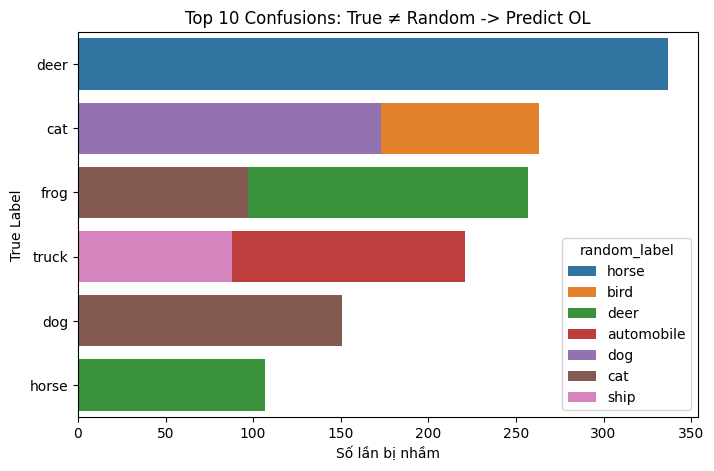

In [25]:
# --- Case 1: true != random nhưng dự đoán OL ---
errors_case1 = df[(df["true_label"] != df["random_label"]) & (df["predicted"] == "OL")]

top_confusions_case1 = (
    errors_case1.groupby(["true_label", "random_label"])
    .size()
    .reset_index(name="count")
    .sort_values("count", ascending=False)
    .head(10)
)

print("Top 10 lỗi: True != Random nhưng dự đoán OL")
print(top_confusions_case1)

plt.figure(figsize=(8,5))
sns.barplot(x="count", y="true_label", hue="random_label", data=top_confusions_case1, dodge=False)
plt.title("Top 10 Confusions: True ≠ Random -> Predict OL")
plt.xlabel("Số lần bị nhầm")
plt.ylabel("True Label")
plt.show()


Top 10 lỗi: True = Random nhưng dự đoán CL
   true_label random_label  count
8        ship         ship    409
6        frog         frog    214
2        bird         bird     34
3         cat          cat     32
4        deer         deer     26
9       truck        truck     23
0    airplane     airplane     19
5         dog          dog     15
1  automobile   automobile      3
7       horse        horse      1


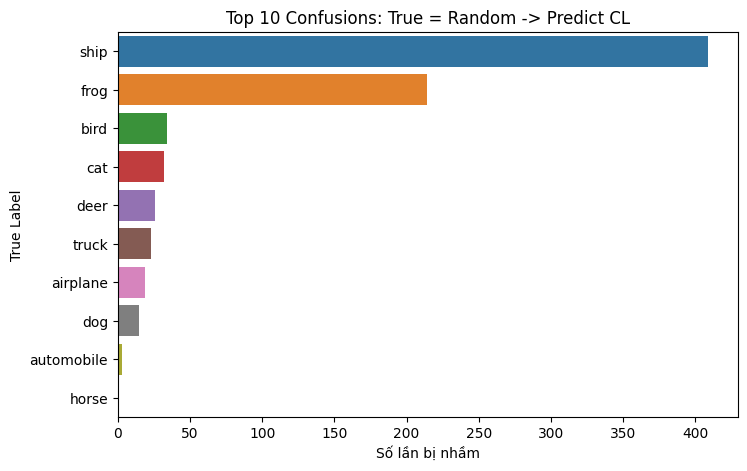

In [26]:
# --- Case 2: true == random nhưng dự đoán CL ---
errors_case2 = df[(df["true_label"] == df["random_label"]) & (df["predicted"] == "CL")]

top_confusions_case2 = (
    errors_case2.groupby(["true_label", "random_label"])
    .size()
    .reset_index(name="count")
    .sort_values("count", ascending=False)
    .head(10)
)

print("\nTop 10 lỗi: True = Random nhưng dự đoán CL")
print(top_confusions_case2)

plt.figure(figsize=(8,5))
sns.barplot(x="count", y="true_label", hue="random_label", data=top_confusions_case2, dodge=False)
plt.title("Top 10 Confusions: True = Random -> Predict CL")
plt.xlabel("Số lần bị nhầm")
plt.ylabel("True Label")
plt.show()

# Does the label {label} relate to this image%3F Answer with only a single word%3A YES or NO.

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("E:\CLL_VLM\Does the label {label} relate to this image%3F Answer with only a single word%3A YES or NO..csv")

df.head

<bound method NDFrame.head of        index  true_label random_label predicted raw_answer
0          0        frog          cat        OL        YES
1          1       truck     airplane        CL         NO
2          2       truck   automobile        OL        YES
3          3        deer        truck        CL         NO
4          4  automobile        horse        CL         NO
...      ...         ...          ...       ...        ...
49995  49995        bird         frog        CL         NO
49996  49996        frog         bird        CL         NO
49997  49997       truck         deer        CL         NO
49998  49998  automobile         deer        CL         NO
49999  49999  automobile        truck        OL        YES

[50000 rows x 5 columns]>

Custom Confusion Matrix:
              Predict OL  Predict CL
True Label          4268         721
Random Label        4382       40629


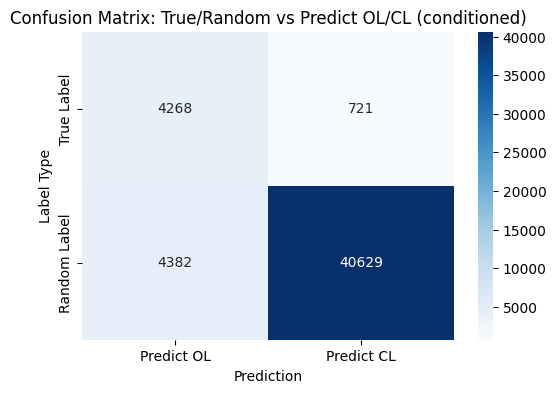

In [28]:
# Initialize counters
true_ol = true_cl = random_ol = random_cl = 0

for _, row in df.iterrows():
    same_label = (row["true_label"] == row["random_label"])
    
    if same_label:
        # Case 1: true_label == random_label
        if row["predicted"] == "OL":
            true_ol += 1
        else:  # predicted == "CL"
            true_cl += 1
    else:
        # Case 2: true_label != random_label
        if row["predicted"] == "OL":
            random_ol += 1   # model chose true
        else:  # predicted == "CL"
            random_cl += 1  # model chose random

# Build confusion matrix
matrix = pd.DataFrame(
    [[true_ol, true_cl],
     [random_ol, random_cl]],
    index=["True Label", "Random Label"],
    columns=["Predict OL", "Predict CL"]
)

print("Custom Confusion Matrix:")
print(matrix)

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix: True/Random vs Predict OL/CL (conditioned)")
plt.ylabel("Label Type")
plt.xlabel("Prediction")
plt.show()

In [29]:
# Accuracy cơ bản
correct = matrix.loc["True Label", "Predict OL"] + matrix.loc["Random Label", "Predict CL"]
total = matrix.values.sum()
accuracy = correct / total

print("Accuracy: {:.2f}%".format(accuracy * 100))

# Tỷ lệ theo loại
true_acc = matrix.loc["True Label", "Predict OL"] / matrix.loc["True Label"].sum()
random_acc = matrix.loc["Random Label", "Predict CL"] / matrix.loc["Random Label"].sum()
noise_ol = matrix.loc["True Label", "Predict CL"] / matrix.loc["True Label"].sum()
noise_cl = matrix.loc["Random Label", "Predict OL"] / matrix.loc["Random Label"].sum()

print("(True Label -> OL): {:.2f}%".format(true_acc * 100))
print("(Random Label -> CL): {:.2f}%".format(random_acc * 100))
print("Noise OL: {:.2f}%".format(noise_ol * 100))
print("Noise CL: {:.2f}%".format(noise_cl * 100))


Accuracy: 89.79%
(True Label -> OL): 85.55%
(Random Label -> CL): 90.26%
Noise OL: 14.45%
Noise CL: 9.74%


Top 10 lỗi: True != Random nhưng dự đoán OL
   true_label random_label  count
31       deer        horse    370
61      truck   automobile    319
21        cat         bird    294
47       frog         ship    276
44       frog         deer    269
23        cat          dog    205
42       frog         bird    199
35        dog          cat    194
38        dog         ship    180
43       frog          cat    174


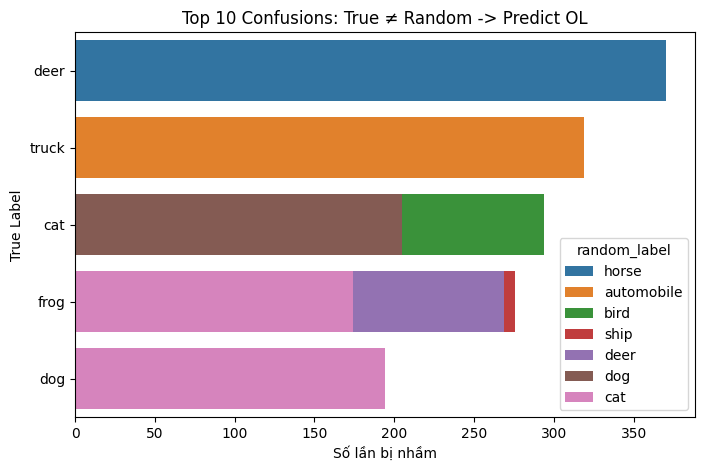

In [30]:
# --- Case 1: true != random nhưng dự đoán OL ---
errors_case1 = df[(df["true_label"] != df["random_label"]) & (df["predicted"] == "OL")]

top_confusions_case1 = (
    errors_case1.groupby(["true_label", "random_label"])
    .size()
    .reset_index(name="count")
    .sort_values("count", ascending=False)
    .head(10)
)

print("Top 10 lỗi: True != Random nhưng dự đoán OL")
print(top_confusions_case1)

plt.figure(figsize=(8,5))
sns.barplot(x="count", y="true_label", hue="random_label", data=top_confusions_case1, dodge=False)
plt.title("Top 10 Confusions: True ≠ Random -> Predict OL")
plt.xlabel("Số lần bị nhầm")
plt.ylabel("True Label")
plt.show()


Top 10 lỗi: True = Random nhưng dự đoán CL
   true_label random_label  count
8        ship         ship    410
6        frog         frog    194
2        bird         bird     28
4        deer         deer     21
0    airplane     airplane     19
9       truck        truck     19
3         cat          cat     18
5         dog          dog      9
1  automobile   automobile      2
7       horse        horse      1


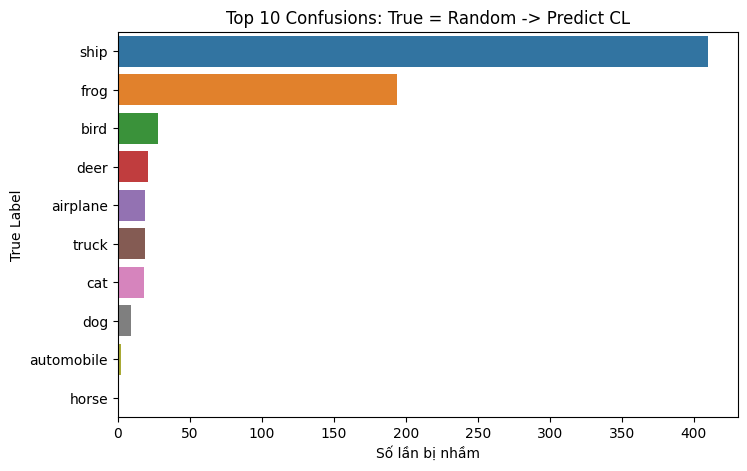

In [31]:
# --- Case 2: true == random nhưng dự đoán CL ---
errors_case2 = df[(df["true_label"] == df["random_label"]) & (df["predicted"] == "CL")]

top_confusions_case2 = (
    errors_case2.groupby(["true_label", "random_label"])
    .size()
    .reset_index(name="count")
    .sort_values("count", ascending=False)
    .head(10)
)

print("\nTop 10 lỗi: True = Random nhưng dự đoán CL")
print(top_confusions_case2)

plt.figure(figsize=(8,5))
sns.barplot(x="count", y="true_label", hue="random_label", data=top_confusions_case2, dodge=False)
plt.title("Top 10 Confusions: True = Random -> Predict CL")
plt.xlabel("Số lần bị nhầm")
plt.ylabel("True Label")
plt.show()

# 09/10 001 p1

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/home/maitanha/cll_vlm/cll_vlm/logs/round1_bottom80_llava.csv")

df.head

<bound method NDFrame.head of       index true_label random_label predicted raw_answer
0         0        cat         bird        OL        YES
1         1        cat        horse        CL         NO
2         2        cat         bird        CL         NO
3         3   airplane        horse        CL         NO
4         4      horse         bird        CL         NO
...     ...        ...          ...       ...        ...
4156   4156       bird          cat        CL         NO
4157   4157        dog     airplane        CL         NO
4158   4158       ship         bird        CL         NO
4159   4159        cat   automobile        CL         NO
4160   4160        cat          cat        OL        YES

[4161 rows x 5 columns]>

Custom Confusion Matrix:
    Predict OL  Predict CL
OL         452           2
CL         152        3555


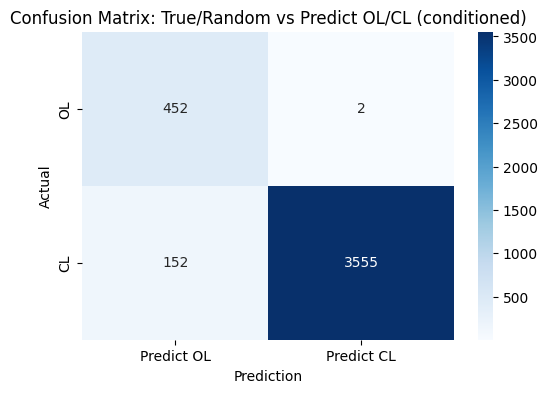

In [31]:
# Initialize counters
true_ol = true_cl = noise_ol = noise_cl = 0

for _, row in df.iterrows():
    same_label = (row["true_label"] == row["random_label"])
    
    if same_label:
        # Case 1: true_label == random_label
        if row["predicted"] == "OL":
            true_ol += 1
        else:  # predicted == "CL"
            true_cl += 1
    else:
        # Case 2: true_label != random_label
        if row["predicted"] == "OL":
            noise_ol += 1   # model chose true
        else:  # predicted == "CL"
            noise_cl += 1  # model chose random

# Build confusion matrix
matrix = pd.DataFrame(
    [[true_ol, true_cl],
     [noise_ol, noise_cl]],
    index=["OL", "CL"],
    columns=["Predict OL", "Predict CL"]
)

print("Custom Confusion Matrix:")
print(matrix)

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix: True/Random vs Predict OL/CL (conditioned)")
plt.ylabel("Actual")
plt.xlabel("Prediction")
plt.show()

In [32]:
# Accuracy cơ bản
correct = matrix.loc["OL", "Predict OL"] + matrix.loc["CL", "Predict CL"]
total = matrix.values.sum()
accuracy = correct / total

print("Accuracy: {:.2f}%".format(accuracy * 100))

# Tỷ lệ theo loại
true_ol = ((df["true_label"] == df["random_label"]) & (df["predicted"] == "OL")).sum()

# đúng CL: true_label != random_label & predicted == CL
true_cl = ((df["true_label"] != df["random_label"]) & (df["predicted"] == "CL")).sum()

# noise OL: true_label != random_label & predicted == OL
noise_ol = ((df["true_label"] != df["random_label"]) & (df["predicted"] == "OL")).sum()

# noise CL: true_label == random_label & predicted == CL
noise_cl = ((df["true_label"] == df["random_label"]) & (df["predicted"] == "CL")).sum()

p_true_ol = true_ol / (true_ol + noise_ol)
p_true_cl = true_cl / (true_cl + noise_cl)
p_noise_ol = noise_ol / (true_ol + noise_ol)
p_noise_cl = noise_cl /  (true_cl + noise_cl)

print("(True Label -> OL): {:.2f}%".format(p_true_ol * 100))
print("(Random Label -> CL): {:.2f}%".format(p_true_cl * 100))
print("Noise OL: {:.2f}%".format(p_noise_ol * 100))
print("Noise CL: {:.2f}%".format(p_noise_cl * 100))


Accuracy: 96.30%
(True Label -> OL): 74.83%
(Random Label -> CL): 99.94%
Noise OL: 25.17%
Noise CL: 0.06%


Top 10 lỗi: True != Random nhưng dự đoán OL
   true_label random_label  count
24       deer        horse    313
34       frog          cat    152
50      truck   automobile    147
18        cat          dog    112
27        dog          cat    107
33       frog         bird     90
16        cat         bird     56
23       deer          dog     52
35       frog         deer     49
10       bird          cat     46


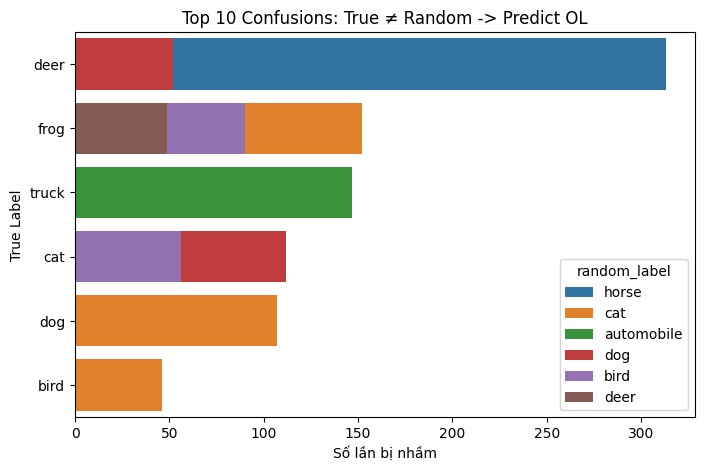

In [17]:
# --- Case 1: true != random nhưng dự đoán OL ---
errors_case1 = df[(df["true_label"] != df["random_label"]) & (df["predicted"] == "OL")]

top_confusions_case1 = (
    errors_case1.groupby(["true_label", "random_label"])
    .size()
    .reset_index(name="count")
    .sort_values("count", ascending=False)
    .head(10)
)

print("Top 10 lỗi: True != Random nhưng dự đoán OL")
print(top_confusions_case1)

plt.figure(figsize=(8,5))
sns.barplot(x="count", y="true_label", hue="random_label", data=top_confusions_case1, dodge=False)
plt.title("Top 10 Confusions: True ≠ Random -> Predict OL")
plt.xlabel("Số lần bị nhầm")
plt.ylabel("True Label")
plt.show()


Top 10 lỗi: True = Random nhưng dự đoán CL
   true_label random_label  count
6        frog         frog    183
4        deer         deer     88
2        bird         bird     66
8        ship         ship     42
0    airplane     airplane     30
9       truck        truck     29
5         dog          dog     25
3         cat          cat     24
7       horse        horse      5
1  automobile   automobile      4


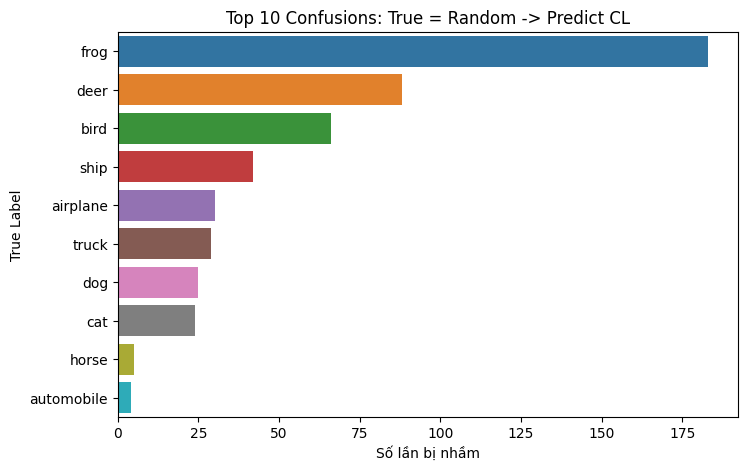

In [18]:
# --- Case 2: true == random nhưng dự đoán CL ---
errors_case2 = df[(df["true_label"] == df["random_label"]) & (df["predicted"] == "CL")]

top_confusions_case2 = (
    errors_case2.groupby(["true_label", "random_label"])
    .size()
    .reset_index(name="count")
    .sort_values("count", ascending=False)
    .head(10)
)

print("\nTop 10 lỗi: True = Random nhưng dự đoán CL")
print(top_confusions_case2)

plt.figure(figsize=(8,5))
sns.barplot(x="count", y="true_label", hue="random_label", data=top_confusions_case2, dodge=False)
plt.title("Top 10 Confusions: True = Random -> Predict CL")
plt.xlabel("Số lần bị nhầm")
plt.ylabel("True Label")
plt.show()

# Analyze Stage 2: CLIP 

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/home/maitanha/cll_vlm/cll_vlm/logs/correspond_1_stage2.csv")
df.head

<bound method NDFrame.head of        index  true_label random_label predicted raw_answer  clip_similarity
0          0        frog          cat        OL        YES          0.20090
1          1       truck     airplane        CL         NO          0.11993
2          2       truck   automobile        CL         NO          0.14920
3          3        deer        truck        CL         NO          0.15720
4          4  automobile        horse        CL         NO          0.16750
...      ...         ...          ...       ...        ...              ...
49995  49995        bird         frog        CL         NO          0.17090
49996  49996        frog         bird        CL         NO          0.18050
49997  49997       truck         deer        CL         NO          0.17310
49998  49998  automobile         deer        CL         NO          0.17350
49999  49999  automobile        truck        CL         NO          0.19340

[50000 rows x 6 columns]>

[INFO] Found 5206 OL samples and 44794 CL samples with valid similarity scores.

===== 🔻 OL có similarity thấp nhất =====


,index,true_label,random_label,predicted,raw_answer,clip_similarity
31284,31284,airplane,ship,OL,YES,0.0834



===== 🔺 OL có similarity cao nhất =====


,index,true_label,random_label,predicted,raw_answer,clip_similarity
30250,30250,deer,deer,OL,YES,0.2905



===== 🔻 CL có similarity thấp nhất =====


,index,true_label,random_label,predicted,raw_answer,clip_similarity
35728,35728,automobile,frog,CL,NO,0.0575



===== 🔺 CL có similarity cao nhất =====


,index,true_label,random_label,predicted,raw_answer,clip_similarity
21929,21929,deer,deer,CL,NO,0.2734



===== 📉 Top 10 OL có similarity thấp nhất =====


,index,true_label,random_label,clip_similarity
31284,31284,airplane,ship,0.08340
47176,47176,airplane,automobile,0.10236
666,666,truck,ship,0.10956
33547,33547,truck,cat,0.11210
24718,24718,truck,ship,0.12510
14902,14902,truck,ship,0.12660
26970,26970,truck,ship,0.12680
3770,3770,ship,ship,0.12740
17765,17765,truck,cat,0.12760
27965,27965,truck,ship,0.12900



===== 📈 Top 10 OL có similarity cao nhất =====


,index,true_label,random_label,clip_similarity
30250,30250,deer,deer,0.2905
5490,5490,deer,deer,0.2780
20147,20147,deer,deer,0.2760
16097,16097,frog,frog,0.2751
20573,20573,deer,deer,0.2751
29738,29738,deer,deer,0.2747
23076,23076,deer,deer,0.2740
31484,31484,deer,deer,0.2727
31118,31118,frog,frog,0.2722
48974,48974,frog,frog,0.2717



===== 📉 Top 10 CL có similarity thấp nhất =====


,index,true_label,random_label,clip_similarity
35728,35728,automobile,frog,0.05750
38798,38798,horse,frog,0.06340
48551,48551,horse,frog,0.06464
8940,8940,ship,cat,0.06490
6189,6189,horse,airplane,0.06537
21582,21582,deer,airplane,0.06790
7886,7886,ship,frog,0.06990
15389,15389,automobile,frog,0.07196
17626,17626,automobile,cat,0.07270
9981,9981,horse,ship,0.07336



===== 📈 Top 10 CL có similarity cao nhất =====


,index,true_label,random_label,clip_similarity
21929,21929,deer,deer,0.2734
36225,36225,deer,deer,0.2676
4785,4785,frog,frog,0.2664
24870,24870,frog,frog,0.2627
20423,20423,horse,horse,0.2625
10076,10076,deer,deer,0.2620
24205,24205,deer,deer,0.2605
31211,31211,deer,deer,0.2595
16874,16874,frog,frog,0.2593
22744,22744,deer,deer,0.2593


/home/maitanha/cll_vlm/venv_cll_llava/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


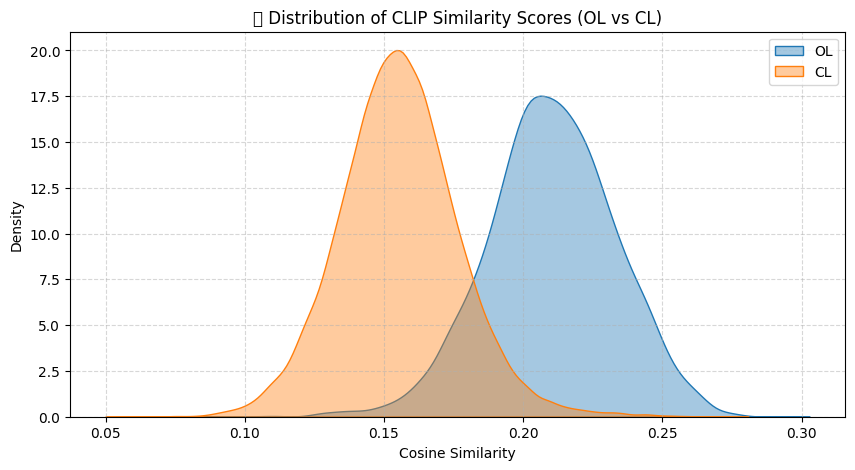

In [28]:
TOP_K = 10  # số lượng top k bạn muốn in ra

# ======== Lọc nhóm OL và CL ========
df_ol = df[df["predicted"] == "OL"].dropna(subset=["clip_similarity"])
df_cl = df[df["predicted"] == "CL"].dropna(subset=["clip_similarity"])
print(f"[INFO] Found {len(df_ol)} OL samples and {len(df_cl)} CL samples with valid similarity scores.")

# ======== Tìm 4 cực trị ========
lowest_ol = df_ol.loc[df_ol["clip_similarity"].idxmin()] if not df_ol.empty else None
highest_ol = df_ol.loc[df_ol["clip_similarity"].idxmax()] if not df_ol.empty else None
lowest_cl = df_cl.loc[df_cl["clip_similarity"].idxmin()] if not df_cl.empty else None
highest_cl = df_cl.loc[df_cl["clip_similarity"].idxmax()] if not df_cl.empty else None

# ======== In kết quả cực trị ========
print("\n===== 🔻 OL có similarity thấp nhất =====")
display(lowest_ol.to_frame().T if lowest_ol is not None else "Không có mẫu OL")

print("\n===== 🔺 OL có similarity cao nhất =====")
display(highest_ol.to_frame().T if highest_ol is not None else "Không có mẫu OL")

print("\n===== 🔻 CL có similarity thấp nhất =====")
display(lowest_cl.to_frame().T if lowest_cl is not None else "Không có mẫu CL")

print("\n===== 🔺 CL có similarity cao nhất =====")
display(highest_cl.to_frame().T if highest_cl is not None else "Không có mẫu CL")

# ======== Top-K ========
print(f"\n===== 📉 Top {TOP_K} OL có similarity thấp nhất =====")
display(df_ol.nsmallest(TOP_K, "clip_similarity")[["index", "true_label", "random_label", "clip_similarity"]])

print(f"\n===== 📈 Top {TOP_K} OL có similarity cao nhất =====")
display(df_ol.nlargest(TOP_K, "clip_similarity")[["index", "true_label", "random_label", "clip_similarity"]])

print(f"\n===== 📉 Top {TOP_K} CL có similarity thấp nhất =====")
display(df_cl.nsmallest(TOP_K, "clip_similarity")[["index", "true_label", "random_label", "clip_similarity"]])

print(f"\n===== 📈 Top {TOP_K} CL có similarity cao nhất =====")
display(df_cl.nlargest(TOP_K, "clip_similarity")[["index", "true_label", "random_label", "clip_similarity"]])

# ======== Vẽ biểu đồ phân bố similarity ========
plt.figure(figsize=(10,5))
sns.kdeplot(df_ol["clip_similarity"], label="OL", fill=True, alpha=0.4)
sns.kdeplot(df_cl["clip_similarity"], label="CL", fill=True, alpha=0.4)
plt.title("📈 Distribution of CLIP Similarity Scores (OL vs CL)")
plt.xlabel("Cosine Similarity")
plt.ylabel("Density")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


In [29]:
import numpy as np

percentiles = [5, 10, 20]

# ======== Lọc nhóm OL và CL ========
df_ol = df[df["predicted"] == "OL"].dropna(subset=["clip_similarity"])
df_cl = df[df["predicted"] == "CL"].dropna(subset=["clip_similarity"])
print(f"[INFO] Found {len(df_ol)} OL and {len(df_cl)} CL samples with valid scores.")

results = []

# ======== OL: bottom X% ========
for p in percentiles:
    threshold = np.percentile(df_ol["clip_similarity"], p)
    subset = df_ol[df_ol["clip_similarity"] <= threshold]

    correct_ol = (subset["true_label"] == subset["random_label"]).sum()
    wrong_ol = len(subset) - correct_ol

    results.append({
        "Group": "OL",
        "Percentile": f"Bottom {p}%",
        "Threshold": threshold,
        "Total": len(subset),
        "True OL (match)": correct_ol,
        "Should be CL (mismatch)": wrong_ol,
        "True OL %": f"{(correct_ol/len(subset)*100 if len(subset)>0 else 0):.2f}%",
        "Should be CL %": f"{(wrong_ol/len(subset)*100 if len(subset)>0 else 0):.2f}%"
    })

# ======== CL: top X% ========
for p in percentiles:
    threshold = np.percentile(df_cl["clip_similarity"], 100 - p)  # top p%
    subset = df_cl[df_cl["clip_similarity"] >= threshold]

    should_be_ol = (subset["true_label"] == subset["random_label"]).sum()
    correct_cl = len(subset) - should_be_ol

    results.append({
        "Group": "CL",
        "Percentile": f"Top {p}%",
        "Threshold": threshold,
        "Total": len(subset),
        "True CL (mismatch)": correct_cl,
        "Should be OL (match)": should_be_ol,
        "True CL %": f"{(correct_cl/len(subset)*100 if len(subset)>0 else 0):.2f}%",
        "Should be OL %": f"{(should_be_ol/len(subset)*100 if len(subset)>0 else 0):.2f}%"
    })

# ======== Kết quả tổng hợp ========
results_df = pd.DataFrame(results)
display(results_df)


[INFO] Found 5206 OL and 44794 CL samples with valid scores.


,Group,Percentile,Threshold,Total,True OL (match),Should be CL (mismatch),True OL %,Should be CL %,True CL (mismatch),Should be OL (match),True CL %,Should be OL %
0,OL,Bottom 5%,0.1722,262,63.0,199.0,24.05%,75.95%,NaN,NaN,NaN,NaN
1,OL,Bottom 10%,0.1812,523,179.0,344.0,34.23%,65.77%,NaN,NaN,NaN,NaN
2,OL,Bottom 20%,0.1917,1044,475.0,569.0,45.50%,54.50%,NaN,NaN,NaN,NaN
3,CL,Top 5%,0.1908,2242,NaN,NaN,NaN,NaN,1713.0,529.0,76.40%,23.60%
4,CL,Top 10%,0.1818,4482,NaN,NaN,NaN,NaN,3893.0,589.0,86.86%,13.14%
5,CL,Top 20%,0.1720,8978,NaN,NaN,NaN,NaN,8330.0,648.0,92.78%,7.22%


# Compare to LLaVA result in Stage 1

In [31]:
import pandas as pd
import numpy as np
import os

# === ⚙️ CONFIG ===
base_name = "correspond_1"
csv_folder = "/home/maitanha/cll_vlm/cll_vlm/logs"  # 📁 đường dẫn thư mục chứa các CSV
file_names = [
    f"{base_name}.csv",
    f"{base_name}_stage2_bottom_ol_5.csv",
    f"{base_name}_stage2_bottom_ol_10.csv",
    f"{base_name}_stage2_bottom_ol_20.csv",
    f"{base_name}_stage2_top_cl_5.csv",
    f"{base_name}_stage2_top_cl_10.csv",
    f"{base_name}_stage2_top_cl_20.csv",
]

# === 📊 HÀM TÍNH METRIC ===
def compute_metrics(df):
    """
    df chứa các cột: true_label, random_label, predicted (OL/CL)
    """
    total = len(df)

    # đúng OL: true_label == random_label & predicted == OL
    true_ol = ((df["true_label"] == df["random_label"]) & (df["predicted"] == "OL")).sum()

    # đúng CL: true_label != random_label & predicted == CL
    true_cl = ((df["true_label"] != df["random_label"]) & (df["predicted"] == "CL")).sum()

    # noise OL: true_label != random_label & predicted == OL
    noise_ol = ((df["true_label"] != df["random_label"]) & (df["predicted"] == "OL")).sum()

    # noise CL: true_label == random_label & predicted == CL
    noise_cl = ((df["true_label"] == df["random_label"]) & (df["predicted"] == "CL")).sum()

    print(true_ol, true_cl, noise_ol, noise_cl)

    acc = (true_ol + true_cl) / total
    p_true_ol = true_ol / (true_ol + noise_cl) if (true_ol + noise_cl) > 0 else 0
    p_true_cl = true_cl / (true_cl + noise_ol) if (true_cl + noise_ol) > 0 else 0
    p_noise_ol = noise_ol / (true_ol + noise_ol) if (true_cl + noise_ol) > 0 else 0
    p_noise_cl = noise_cl / (true_cl + noise_cl) if (true_ol + noise_cl) > 0 else 0

    return {
        "accuracy": f"{acc*100:.2f}% ({true_ol+true_cl}/ {total})",
        "True → OL": f"{p_true_ol*100:.2f}% ({true_ol}/ {true_ol+noise_cl})",
        "Random → CL": f"{p_true_cl*100:.2f}% ({true_cl}/ {true_cl+noise_ol})",
        "Noise OL": f"{p_noise_ol*100:.2f}% ({noise_ol}/ {true_cl+noise_ol})",
        "Noise CL": f"{p_noise_cl*100:.2f}% ({noise_cl}/ {true_ol+noise_cl})",
    }

# === 📈 TÍNH TOÁN VÀ TỔNG HỢP ===
metrics_table = []

for fname in file_names:
    path = os.path.join(csv_folder, fname)
    if os.path.exists(path):
        df = pd.read_csv(path)
        metrics = compute_metrics(df)
        metrics["File"] = os.path.splitext(fname)[0]
        metrics_table.append(metrics)
    else:
        print(f"⚠️ Không tìm thấy file: {path}")

result_df = pd.DataFrame(metrics_table)
result_df = result_df[["File", "accuracy", "True → OL", "Random → CL", "Noise OL", "Noise CL"]]

# === 📊 HIỂN THỊ KẾT QUẢ ===
print("📊 Bảng so sánh kết quả giữa các stage:")
display(result_df.style.set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'center')]},
     {'selector': 'td', 'props': [('text-align', 'center')]}]
).set_caption("So sánh độ chính xác và noise OL/CL sau các stage"))


4276 44081 930 713
4213 44280 731 776
4097 44425 586 892
3801 44650 361 1188
4805 42371 2640 184
4865 40191 4820 124
4924 35771 9240 65
📊 Bảng so sánh kết quả giữa các stage:


,File,accuracy,True → OL,Random → CL,Noise OL,Noise CL
0,correspond_1,96.71% (48357/ 50000),85.71% (4276/ 4989),97.93% (44081/ 45011),17.86% (930/ 45011),1.59% (713/ 4989)
1,correspond_1_stage2_bottom_ol_5,96.99% (48493/ 50000),84.45% (4213/ 4989),98.38% (44280/ 45011),14.79% (731/ 45011),1.72% (776/ 4989)
2,correspond_1_stage2_bottom_ol_10,97.04% (48522/ 50000),82.12% (4097/ 4989),98.70% (44425/ 45011),12.51% (586/ 45011),1.97% (892/ 4989)
3,correspond_1_stage2_bottom_ol_20,96.90% (48451/ 50000),76.19% (3801/ 4989),99.20% (44650/ 45011),8.67% (361/ 45011),2.59% (1188/ 4989)
4,correspond_1_stage2_top_cl_5,94.35% (47176/ 50000),96.31% (4805/ 4989),94.13% (42371/ 45011),35.46% (2640/ 45011),0.43% (184/ 4989)
5,correspond_1_stage2_top_cl_10,90.11% (45056/ 50000),97.51% (4865/ 4989),89.29% (40191/ 45011),49.77% (4820/ 45011),0.31% (124/ 4989)
6,correspond_1_stage2_top_cl_20,81.39% (40695/ 50000),98.70% (4924/ 4989),79.47% (35771/ 45011),65.24% (9240/ 45011),0.18% (65/ 4989)


In [40]:
import pandas as pd
df = pd.read_csv("/home/maitanha/cll_vlm/cll_vlm/logs/correspond_1_stage2.csv")

ol_df = df[df["predicted"] == "OL"].dropna(subset=["clip_similarity"])
sims_ol = ol_df["clip_similarity"].values
p5_ol, p10_ol, p20_ol, p40_ol = np.percentile(sims_ol, [95, 90, 80, 60])
print(f"[INFO] OL Thresholds (TOP): 5%={p5_ol:.4f}, 10%={p10_ol:.4f}, 20%={p20_ol:.4f}, 40%={p40_ol:.4f}")
output_dir = "/home/maitanha/cll_vlm/cll_vlm/logs"
def keep_top_ol_flip_rest(threshold, percent):
    new_df = df.copy()
    keep_mask = (new_df["predicted"] == "OL") & (new_df["clip_similarity"] >= threshold)
    flip_mask = (new_df["predicted"] == "OL") & (~keep_mask)
    new_df.loc[flip_mask, "predicted"] = "CL"
    out_path = os.path.join(output_dir, f"{base_name}_stage2_top_ol_{percent}.csv")
    new_df.to_csv(out_path, index=False)
    print(f"[SAVED] {out_path} — Kept {keep_mask.sum()} top OL | Flipped {flip_mask.sum()} OL → CL")

for p, th in [(5, p5_ol), (10, p10_ol), (20, p20_ol), (40, p40_ol)]:
    keep_top_ol_flip_rest(th, p)

[INFO] OL Thresholds (TOP): 5%=0.2471, 10%=0.2398, 20%=0.2294, 40%=0.2158
[SAVED] /home/maitanha/cll_vlm/cll_vlm/logs/correspond_1_stage2_top_ol_5.csv — Kept 264 top OL | Flipped 4942 OL → CL
[SAVED] /home/maitanha/cll_vlm/cll_vlm/logs/correspond_1_stage2_top_ol_10.csv — Kept 521 top OL | Flipped 4685 OL → CL
[SAVED] /home/maitanha/cll_vlm/cll_vlm/logs/correspond_1_stage2_top_ol_20.csv — Kept 1045 top OL | Flipped 4161 OL → CL
[SAVED] /home/maitanha/cll_vlm/cll_vlm/logs/correspond_1_stage2_top_ol_40.csv — Kept 2085 top OL | Flipped 3121 OL → CL


In [ ]:
import pandas as pd
import numpy as np
import os

# === ⚙️ CONFIG ===
base_name = "correspond_1"
csv_folder = "/home/maitanha/cll_vlm/cll_vlm/logs"  # 📁 đường dẫn thư mục chứa các CSV
file_names = [
    f"{base_name}.csv",
    f"{base_name}_stage2_top_ol_5.csv",
    f"{base_name}_stage2_top_ol_10.csv",
    f"{base_name}_stage2_top_ol_20.csv",
    f"{base_name}_stage2_top_ol_40.csv",

]

# === 📊 HÀM TÍNH METRIC ===
def compute_metrics(df):
    """
    df chứa các cột: true_label, random_label, predicted (OL/CL)
    """
    total = len(df)
    
    # đúng OL: true_label == random_label & predicted == OL
    true_ol = ((df["true_label"] == df["random_label"]) & (df["predicted"] == "OL")).sum()

    # đúng CL: true_label != random_label & predicted == CL
    true_cl = ((df["true_label"] != df["random_label"]) & (df["predicted"] == "CL")).sum()

    # noise OL: true_label != random_label & predicted == OL
    noise_ol = ((df["true_label"] != df["random_label"]) & (df["predicted"] == "OL")).sum()

    # noise CL: true_label == random_label & predicted == CL
    noise_cl = ((df["true_label"] == df["random_label"]) & (df["predicted"] == "CL")).sum()

    print(true_ol, true_cl, noise_ol, noise_cl)

    acc = (true_ol + true_cl) / total
    p_true_ol = true_ol / (true_ol + noise_ol) if (true_ol + noise_cl) > 0 else 0
    p_true_cl = true_cl / (true_cl + noise_cl) if (true_cl + noise_ol) > 0 else 0
    p_noise_ol = noise_ol / (true_ol + noise_ol) if (true_cl + noise_ol) > 0 else 0
    p_noise_cl = noise_cl / (true_cl + noise_cl) if (true_ol + noise_cl) > 0 else 0

    return {
        "accuracy": f"{acc*100:.2f}% ({true_ol+true_cl}/ {total})",
        "True → OL": f"{p_true_ol*100:.2f}% ({true_ol}/ {true_ol+noise_ol})",
        "Random → CL": f"{p_true_cl*100:.2f}% ({true_cl}/ {true_cl+noise_cl})",
        "Noise OL": f"{p_noise_ol*100:.2f}% ({noise_ol}/ {true_ol+noise_ol})",
        "Noise CL": f"{p_noise_cl*100:.2f}% ({noise_cl}/ {true_cl+noise_cl})",
    }

# === 📈 TÍNH TOÁN VÀ TỔNG HỢP ===
metrics_table = []

for fname in file_names:
    path = os.path.join(csv_folder, fname)
    if os.path.exists(path):
        df = pd.read_csv(path)
        metrics = compute_metrics(df)
        metrics["File"] = os.path.splitext(fname)[0]
        metrics_table.append(metrics)
    else:
        print(f"⚠️ Không tìm thấy file: {path}")

result_df = pd.DataFrame(metrics_table)
result_df = result_df[["File", "accuracy", "True → OL", "Random → CL", "Noise OL", "Noise CL"]]

# === 📊 HIỂN THỊ KẾT QUẢ ===
print("📊 Bảng so sánh kết quả giữa các stage:")
display(result_df.style.set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'center')]},
     {'selector': 'td', 'props': [('text-align', 'center')]}]
).set_caption("So sánh độ chính xác và noise OL/CL sau các stage"))


Total len 50000
4276 44081 930 713
Total len 50000
260 45007 4 4729
Total len 50000
511 45001 10 4478
Total len 50000
1019 44985 26 3970
Total len 50000
2000 44926 85 2989
📊 Bảng so sánh kết quả giữa các stage:


,File,accuracy,True → OL,Random → CL,Noise OL,Noise CL
0,correspond_1,96.71% (48357/ 50000),82.14% (4276/ 5206),98.41% (44081/ 44794),17.86% (930/ 5206),1.59% (713/ 44794)
1,correspond_1_stage2_top_ol_5,90.53% (45267/ 50000),98.48% (260/ 264),90.49% (45007/ 49736),1.52% (4/ 264),9.51% (4729/ 49736)
2,correspond_1_stage2_top_ol_10,91.02% (45512/ 50000),98.08% (511/ 521),90.95% (45001/ 49479),1.92% (10/ 521),9.05% (4478/ 49479)
3,correspond_1_stage2_top_ol_20,92.01% (46004/ 50000),97.51% (1019/ 1045),91.89% (44985/ 48955),2.49% (26/ 1045),8.11% (3970/ 48955)
4,correspond_1_stage2_top_ol_40,93.85% (46926/ 50000),95.92% (2000/ 2085),93.76% (44926/ 47915),4.08% (85/ 2085),6.24% (2989/ 47915)


In [1]:
import pandas as pd

correspond1_round0_stage2 = pd.read_csv("/home/maitanha/cll_vlm/cll_vlm/logs/correspond_1_stage2.csv")
correspond1_round0_stage2_OL = correspond1_round0_stage2[correspond1_round0_stage2["predicted"] == "OL"]
correspond1_round0_stage2_OL.head

<bound method NDFrame.head of        index  true_label random_label predicted raw_answer  clip_similarity
0          0        frog          cat        OL        YES           0.2009
9          9         cat          cat        OL        YES           0.2054
21        21         cat          cat        OL        YES           0.2065
30        30    airplane     airplane        OL        YES           0.2068
34        34        deer        horse        OL        YES           0.1819
...      ...         ...          ...       ...        ...              ...
49910  49910        ship         ship        OL        YES           0.1855
49959  49959  automobile   automobile        OL        YES           0.2408
49975  49975         cat          cat        OL        YES           0.2502
49979  49979         cat          cat        OL        YES           0.1995
49983  49983         cat          cat        OL        YES           0.1902

[5206 rows x 6 columns]>

In [29]:
threshold = correspond1_round0_stage2_OL["clip_similarity"].quantile(0.8)

round0_OL_20 = correspond1_round0_stage2_OL[correspond1_round0_stage2_OL["clip_similarity"] >= threshold].copy()
round0_OL_80 = correspond1_round0_stage2_OL[correspond1_round0_stage2_OL["clip_similarity"] < threshold].copy()
round0_OL_80.head

<bound method NDFrame.head of        index true_label random_label predicted raw_answer  clip_similarity
0          0       frog          cat        OL        YES           0.2009
9          9        cat          cat        OL        YES           0.2054
21        21        cat          cat        OL        YES           0.2065
30        30   airplane     airplane        OL        YES           0.2068
34        34       deer        horse        OL        YES           0.1819
...      ...        ...          ...       ...        ...              ...
49881  49881       bird         bird        OL        YES           0.1942
49903  49903      horse          dog        OL        YES           0.1876
49910  49910       ship         ship        OL        YES           0.1855
49979  49979        cat          cat        OL        YES           0.1995
49983  49983        cat          cat        OL        YES           0.1902

[4161 rows x 6 columns]>

Custom Confusion Matrix:
    Predict OL  Predict CL
OL        3257           0
CL         904           0


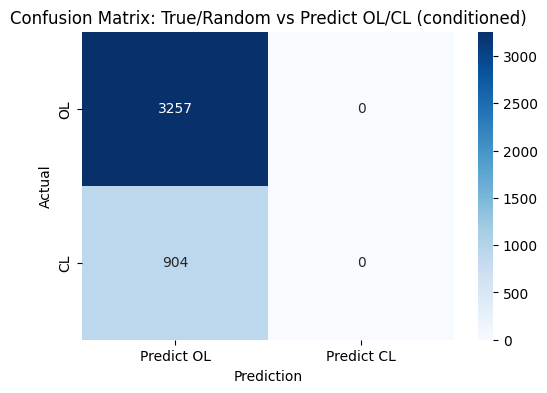

In [33]:
# Initialize counters
true_ol = true_cl = noise_ol = noise_cl = 0

for _, row in round0_OL_80.iterrows():
    same_label = (row["true_label"] == row["random_label"])
    
    if same_label:
        # Case 1: true_label == random_label
        if row["predicted"] == "OL":
            true_ol += 1
        else:  # predicted == "CL"
            true_cl += 1
    else:
        # Case 2: true_label != random_label
        if row["predicted"] == "OL":
            noise_ol += 1   # model chose true
        else:  # predicted == "CL"
            noise_cl += 1  # model chose random

# Build confusion matrix
matrix = pd.DataFrame(
    [[true_ol, true_cl],
     [noise_ol, noise_cl]],
    index=["OL", "CL"],
    columns=["Predict OL", "Predict CL"]
)

print("Custom Confusion Matrix:")
print(matrix)

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix: True/Random vs Predict OL/CL (conditioned)")
plt.ylabel("Actual")
plt.xlabel("Prediction")
plt.show()

In [22]:
from dataset.cldataset import CLDataset
from dataset.cifar10 import CIFAR10Dataset
from torch.utils.data import DataLoader

class MockConfig:
    def __init__(self):
        self.debug = True

# Example usage
cfg = MockConfig()  # Replace with actual config object

train_dataset = CIFAR10Dataset(
    root='/home/maitanha/cll_vlm/cll_vlm/data/cifar10',
    train=True,
    transform=None  # No transform for visualization
)
train_dataset.cfg = cfg
_, shuffled_1 = train_dataset.get_shuffled_labels_dataset(seed=42)

In [27]:
from torch.utils.data import Subset, DataLoader

# Lấy danh sách index từ dataframe
subset_indices = round0_OL_80["index"].tolist()

subset_dataset = shuffled_1.get_subset_by_indices(subset_indices)

# for comparison
subset_orig = subset_dataset

print(type(subset_dataset))  # <class 'dataset.cifar10.CIFAR10Dataset'>
print(len(subset_dataset))
_, shuffled_dataset = subset_dataset.get_shuffled_labels_dataset(seed=42)

<class 'dataset.cifar10.CIFAR10Dataset'>
4161


In [24]:
print(shuffled_dataset.classes)

def collate_fn(batch):
    """Return lists of PIL images and labels (no tensor conversion)."""
    images, labels = zip(*batch)
    return list(images), list(labels)

dataloader = DataLoader(shuffled_dataset, batch_size=16, collate_fn=collate_fn, shuffle=False)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


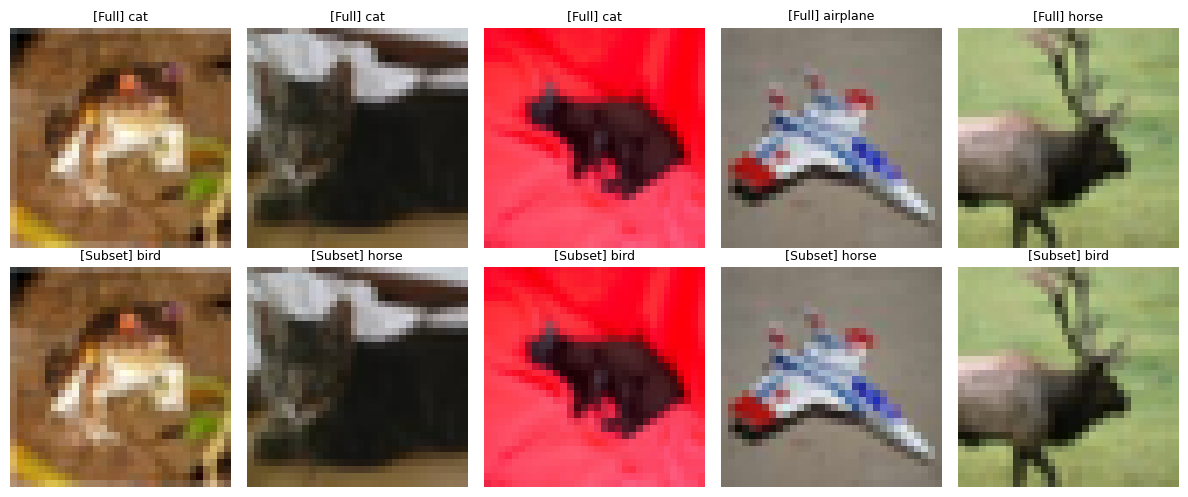

🔹 First 5 labels (full shuffle): ['cat', 'airplane', 'automobile', 'truck', 'horse']
🔸 First 5 labels (subset shuffle): ['bird', 'horse', 'bird', 'horse', 'bird']


In [28]:
import matplotlib.pyplot as plt

num_samples = 5

plt.figure(figsize=(12, 5))

for i in range(num_samples):
    # --- Dòng 1: subset_orig (full shuffle) ---
    img1, label1_idx = subset_orig[i]
    label1_name = subset_orig.classes[label1_idx] if isinstance(label1_idx, int) else str(label1_idx)

    plt.subplot(2, num_samples, i + 1)
    plt.imshow(img1)
    plt.title(f"[Full] {label1_name}", fontsize=9)
    plt.axis("off")

    # --- Dòng 2: shuffled_dataset (subset shuffle) ---
    img2, label2_idx = shuffled_dataset[i]
    label2_name = shuffled_dataset.classes[label2_idx] if isinstance(label2_idx, int) else str(label2_idx)

    plt.subplot(2, num_samples, num_samples + i + 1)
    plt.imshow(img2)
    plt.title(f"[Subset] {label2_name}", fontsize=9)
    plt.axis("off")

plt.tight_layout()
plt.show()

# In ra tên nhãn để đối chiếu
print("🔹 First 5 labels (full shuffle):",
      [shuffled_1.classes[int(shuffled_1.targets[i])] for i in range(num_samples)])
print("🔸 First 5 labels (subset shuffle):",
      [shuffled_dataset.classes[int(shuffled_dataset.targets[i])] for i in range(num_samples)])

Custom Confusion Matrix:
    Predict OL  Predict CL
OL         452           2
CL         152        3555


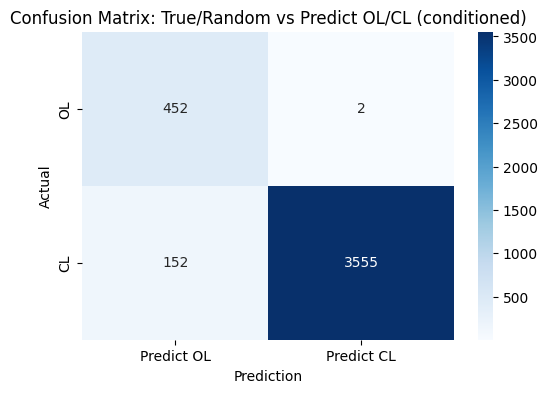

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/home/maitanha/cll_vlm/cll_vlm/logs/round1_bottom80_llava.csv")

# Initialize counters
true_ol = true_cl = noise_ol = noise_cl = 0

for _, row in df.iterrows():
    same_label = (row["true_label"] == row["random_label"])
    
    if same_label:
        # Case 1: true_label == random_label
        if row["predicted"] == "OL":
            true_ol += 1
        else:  # predicted == "CL"
            true_cl += 1
    else:
        # Case 2: true_label != random_label
        if row["predicted"] == "OL":
            noise_ol += 1   # model chose true
        else:  # predicted == "CL"
            noise_cl += 1  # model chose random

# Build confusion matrix
matrix = pd.DataFrame(
    [[true_ol, true_cl],
     [noise_ol, noise_cl]],
    index=["OL", "CL"],
    columns=["Predict OL", "Predict CL"]
)

print("Custom Confusion Matrix:")
print(matrix)

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix: True/Random vs Predict OL/CL (conditioned)")
plt.ylabel("Actual")
plt.xlabel("Prediction")
plt.show()


In [5]:
# Accuracy cơ bản
correct = matrix.loc["OL", "Predict OL"] + matrix.loc["CL", "Predict CL"]
total = matrix.values.sum()
accuracy = correct / total

print("Accuracy: {:.2f}%".format(accuracy * 100))

# Tỷ lệ theo loại
true_ol = ((df["true_label"] == df["random_label"]) & (df["predicted"] == "OL")).sum()

# đúng CL: true_label != random_label & predicted == CL
true_cl = ((df["true_label"] != df["random_label"]) & (df["predicted"] == "CL")).sum()

# noise OL: true_label != random_label & predicted == OL
noise_ol = ((df["true_label"] != df["random_label"]) & (df["predicted"] == "OL")).sum()

# noise CL: true_label == random_label & predicted == CL
noise_cl = ((df["true_label"] == df["random_label"]) & (df["predicted"] == "CL")).sum()

p_true_ol = true_ol / (true_ol + noise_ol)
p_true_cl = true_cl / (true_cl + noise_cl)
p_noise_ol = noise_ol / (true_ol + noise_ol)
p_noise_cl = noise_cl /  (true_cl + noise_cl)

print("(True Label -> OL): {:.2f}%".format(p_true_ol * 100))
print("(Random Label -> CL): {:.2f}%".format(p_true_cl * 100))
print("Noise OL: {:.2f}%".format(p_noise_ol * 100))
print("Noise CL: {:.2f}%".format(p_noise_cl * 100))


Accuracy: 96.30%
(True Label -> OL): 74.83%
(Random Label -> CL): 99.94%
Noise OL: 25.17%
Noise CL: 0.06%
